In [26]:
FILE_TO_CHECK = "Os1/1_raw.fif"

In [27]:
from pathlib import Path

import mne
import numpy as np

In [28]:
CHANNELS = [
    "P8",
    "O2",
    "P4",
    "C4",
    "F8",
    "F4",
    "Oz",
    "Cz",
    "Fz",
    "Pz",
    "F3",
    "O1",
    "P7",
    "C3",
    "P3",
    "F7",
    "T8",
    "FC6",
    "CP6",
    "CP2",
    "PO4",
    "FC2",
    "AF4",
    "POz",
    "AFz",
    "AF3",
    "FC1",
    "FC5",
    "T7",
    "CP1",
    "CP5",
    "PO3",
]

VOLTS_IN_MICROVOLT = 10**-6
LOWPASS_FREQUENCY = 1
HIGHPASS_FREQUENCY = 50
SAMPLING_FREQUENCY = 250
MAX_FREQUENCY = SAMPLING_FREQUENCY // 2
BANDSTOP_FREQUENCY = np.arange(50, MAX_FREQUENCY, 50)

In [29]:
def preprocess_data(raw_data):
    raw_data.pick(CHANNELS)
    raw_data.apply_function(fun=lambda x: x * VOLTS_IN_MICROVOLT)
    raw_data.filter(l_freq=LOWPASS_FREQUENCY, h_freq=HIGHPASS_FREQUENCY)
    raw_data.notch_filter(BANDSTOP_FREQUENCY)

In [30]:
data_path = Path.cwd() / "data" / FILE_TO_CHECK
sample_raw = mne.io.read_raw_fif(data_path)
sample_raw.load_data()
preprocess_data(sample_raw)
sample_raw

<Raw | 1_raw.fif, 32 x 56751 (227.0 s), ~13.9 MiB, data loaded>

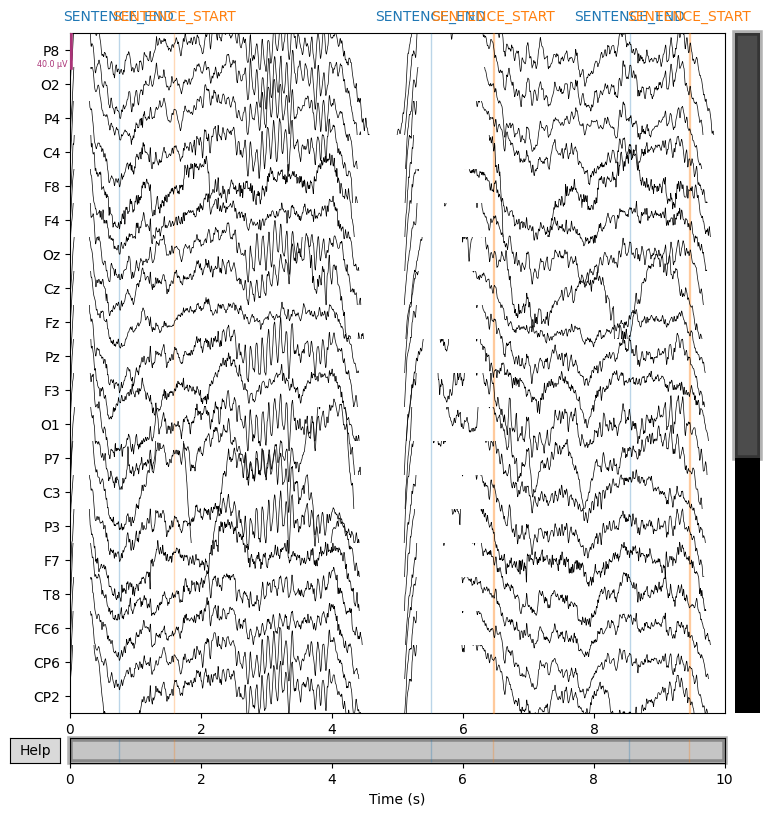

In [31]:
TMIN = 5
TMAX = 15

sample_raw.crop(tmin=TMIN, tmax=TMAX).plot();